<h2>Лабораторная работа №2 по курсу "Методы машинного обучения"</h2>

<p><b>Выполнил:</b> Арбузов А.П. группа ИУ5-24М</p>

<h3>Задание</h3>
<p>Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.</p>
    <p>Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:</p>
<ul>
    <li>устранение пропусков в данных;</li>
    <li>кодирование категориальных признаков;</li>
    <li>нормализацию числовых признаков.</li>
</ul>

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [30]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [31]:
data = pd.read_csv('vgsales.csv', sep=",")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Заполнение пустых значений

In [32]:
columnsWithNull = []

print("Столбцы с пустыми значениями (название (число уникальных значений): число пустых):\n")
for column in data.columns:
    if data[column].isnull().sum() > 0:
        columnsWithNull.append(column)
        print("\t", column,"(", len(data[column].unique()), "):\t", data[column].isnull().sum())

Столбцы с пустыми значениями (название (число уникальных значений): число пустых):

	 Year ( 40 ):	 271
	 Publisher ( 579 ):	 58


Убрали пустые поля из столбца с годом

In [33]:
data = data.dropna(subset = ['Year'])
data.isnull().sum()

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

Пустые поля в столбце Издатель заменили на "Unknown", неизвестно

In [34]:
imputer = SimpleImputer(missing_values=np.nan, strategy="constant", fill_value = "Unknown")
data = pd.DataFrame(data = imputer.fit_transform(data), columns=data.columns)
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

Кодирование категориальных признаков

In [35]:
labelEnc = LabelEncoder()
for column in data.columns:
    if data[column].dtype not in ['float', 'int']:
        data[[column]] = pd.DataFrame(labelEnc.fit_transform(data[column].astype(str)), columns=[column])
data.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,10883,26,26,10,359,363,246,221,156,607
1,7587,9229,11,5,4,359,290,264,242,77,500
2,8679,5508,26,28,6,359,207,192,222,153,434
3,9776,10885,26,29,10,359,206,191,214,152,433
4,10869,7266,5,16,7,359,200,300,170,96,432
5,11960,9611,5,9,5,359,288,211,230,58,431
6,13045,6648,4,26,4,359,201,302,241,150,430
7,14140,10881,26,26,3,359,203,301,205,149,350
8,15235,6651,26,29,4,359,204,296,234,144,349
9,1,2554,11,4,8,359,289,63,28,47,348


Нормализация числовых признаков

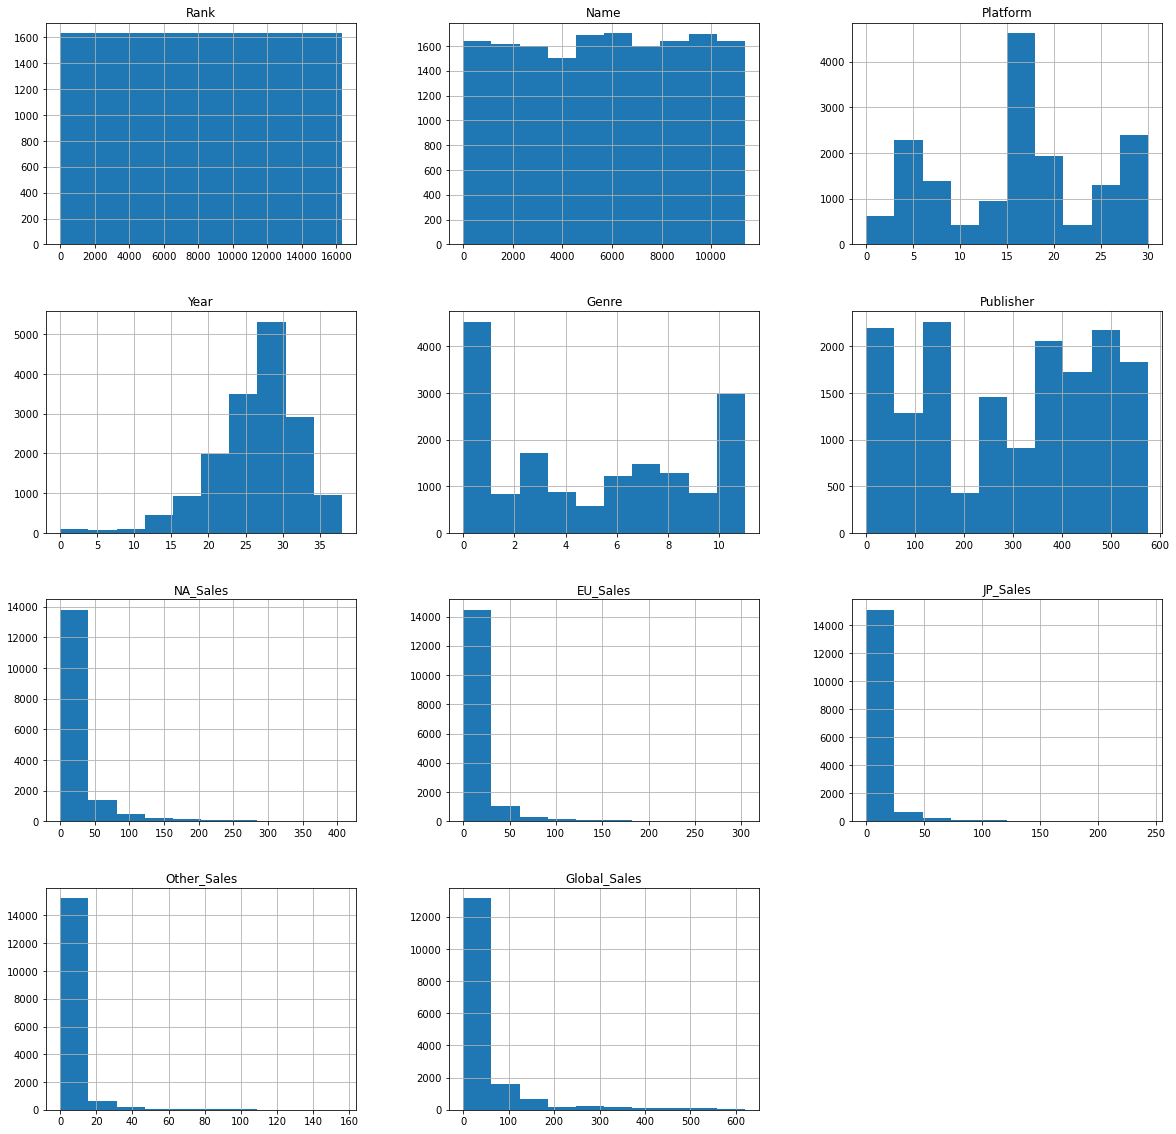

In [36]:
data.hist(figsize=(20,20))
plt.show()

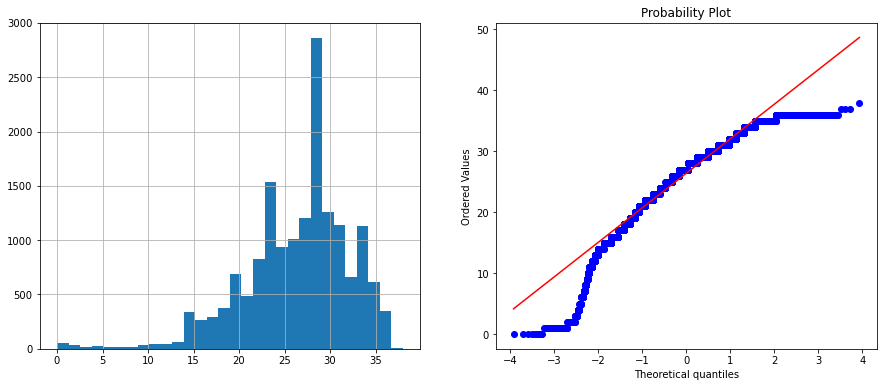

In [37]:
diagnostic_plots(data, 'Year')

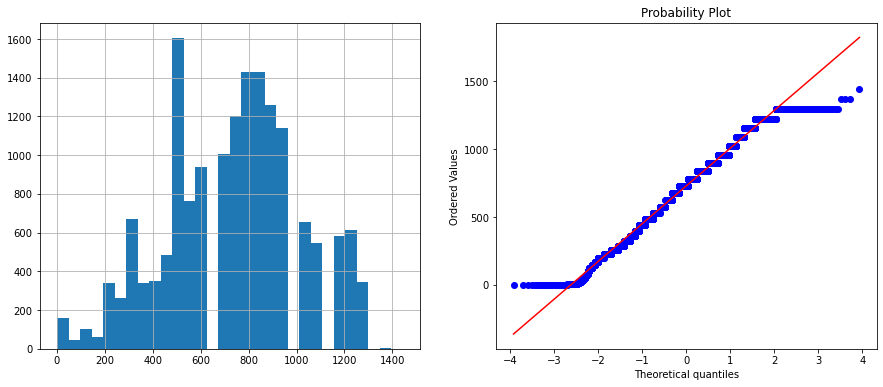

In [38]:
data['Year_sqr'] = data['Year']**(2)
diagnostic_plots(data, 'Year_sqr')

In [ ]:
|